In [74]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the column names from the etsy_listings table
query = "PRAGMA table_info(etsy_listings);"

# Execute the query and load the results into a DataFrame
column_info_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the column names
column_names = column_info_df['name'].tolist()
print(column_names)


['listing_id', 'user_id', 'shop_id', 'title', 'description', 'state', 'creation_timestamp', 'created_timestamp', 'ending_timestamp', 'original_creation_timestamp', 'last_modified_timestamp', 'updated_timestamp', 'state_timestamp', 'quantity', 'shop_section_id', 'featured_rank', 'url', 'num_favorers', 'non_taxable', 'is_taxable', 'is_customizable', 'is_personalizable', 'personalization_is_required', 'personalization_char_count_max', 'personalization_instructions', 'listing_type', 'tags', 'materials', 'shipping_profile_id', 'return_policy_id', 'processing_min', 'processing_max', 'who_made', 'when_made', 'is_supply', 'item_weight', 'item_weight_unit', 'item_length', 'item_width', 'item_height', 'item_dimensions_unit', 'is_private', 'style', 'file_data', 'has_variations', 'should_auto_renew', 'language', 'taxonomy_id', 'production_partners', 'skus', 'views', 'price_amount', 'price_currency']


In [75]:
# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Define the SQL query to retrieve the desired columns, sorted by views
query = """
SELECT 
    listing_id, 
    views, 
    title, 
    description, 
    tags, 
    style, 
    listing_type
FROM etsy_listings
ORDER BY views DESC;
"""

# Execute the query and load the results into a DataFrame
sorted_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the results
print(sorted_listings_df.head(50))  # Show the top 50 listings by views


    listing_id   views                                              title  \
0   1241886892  566544  Personalized Watercolor Memorial Portrait on C...   
1   1083643600  347159  watercolor painting from photo, custom dog por...   
2   1349321977  275632  Digital Pet Portrait, Custom Pet Portrait, Pet...   
3   1491594213  248785  Custom Mini Watercolor Pet Portrait, Tiny Dog ...   
4    979304488  160574  Watercolor painting from photo, watercolor pai...   
5   1517287556  122225  Enchanting Celestial Moon Art Print - Vintage-...   
6   1237647786  121512  Custom Hand-Painted House Painting, New Home H...   
7   1407983980  102022  Faith as Small as a Mustard Seed Can Move Moun...   
8   1146622408   81464  Merge Family Photos, Add Person To Photo, Cust...   
9   1729608168   75138  Tree Ring Framed Wall Art, Abstract Colorful T...   
10  1695131762   68142  Custom Portrait From Photo, Oil Painting Style...   
11  1723107930   61752  Botanical Goth Print, Victorian Gothic Home De...   

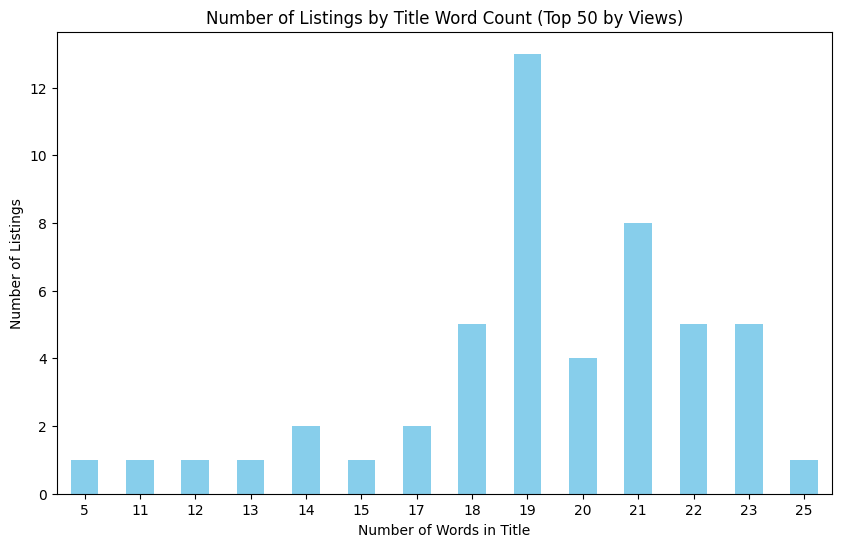

In [76]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Define the SQL query to retrieve the top 50 listings by views
query = """
SELECT 
    listing_id, 
    views, 
    title
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Calculate the word count for each title
top_listings_df['word_count'] = top_listings_df['title'].apply(lambda x: len(x.split()))

# Group by word count and count the number of listings
word_count_distribution = top_listings_df['word_count'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
word_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Listings by Title Word Count (Top 50 by Views)')
plt.xlabel('Number of Words in Title')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)

# Save the plot
plt.savefig('listing_title_word_count_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


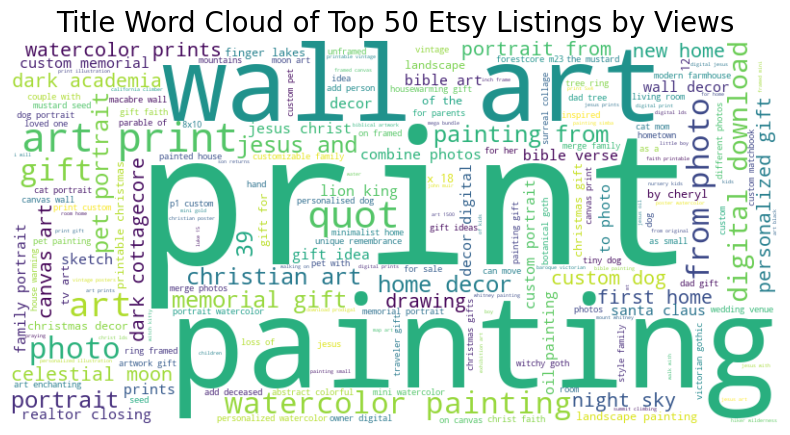

               Keyword  Frequency
0                print         13
1             painting         12
2             wall art         12
3            art print         10
4                 quot          9
5                  art          7
6                photo          5
7  watercolor painting          5
8           from photo          5
9                 gift          5


In [77]:
import sqlite3
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the top 50 listings by views
query = """
SELECT 
    title
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Concatenate all titles into a single string
all_titles = ' '.join(top_listings_df['title'].tolist())

# Use regex to find all words and phrases (two-word phrases)
words = re.findall(r'\b\w+\s\w+|\b\w+\b', all_titles.lower())  # Match two-word phrases or single words

# Count the frequency of each word/phrase
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis

# Add a title to the figure
plt.title('Title Word Cloud of Top 50 Etsy Listings by Views', fontsize=20)

# Save the figure
plt.savefig('title_etsy_word_cloud.png', format='png', bbox_inches='tight')

# Show the word cloud
plt.show()

# Get the top 10 words/phrases by frequency
top_keywords = word_counts.most_common(10)

# Convert to a DataFrame for better readability
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# Display the top keywords
print(top_keywords_df)



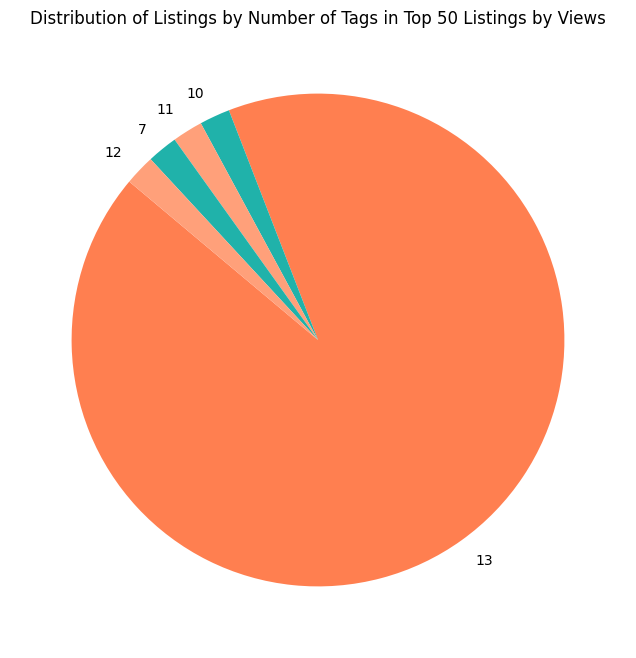

In [109]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the top 50 listings by views along with their tags
query = """
SELECT 
    title, 
    tags 
FROM etsy_listings 
ORDER BY views DESC 
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Function to count tags
def count_tags(tags):
    if pd.isnull(tags) or tags == '':
        return 0
    return len(tags.split(','))  # Assuming tags are comma-separated

# Apply the function to count tags for each listing
top_listings_df['tag_count'] = top_listings_df['tags'].apply(count_tags)

# Count how many listings have each tag count
tag_count_distribution = top_listings_df['tag_count'].value_counts()

# Define colors: Coral and complementary colors
colors = ['coral'] + ['lightseagreen' if i % 2 == 0 else 'lightsalmon' for i in range(len(tag_count_distribution) - 1)]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tag_count_distribution, labels=tag_count_distribution.index, startangle=140, colors=colors)
plt.title('Distribution of Listings by Number of Tags in Top 50 Listings by Views')

# Save the figure
plt.savefig('tag_count_distribution_pie_chart.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


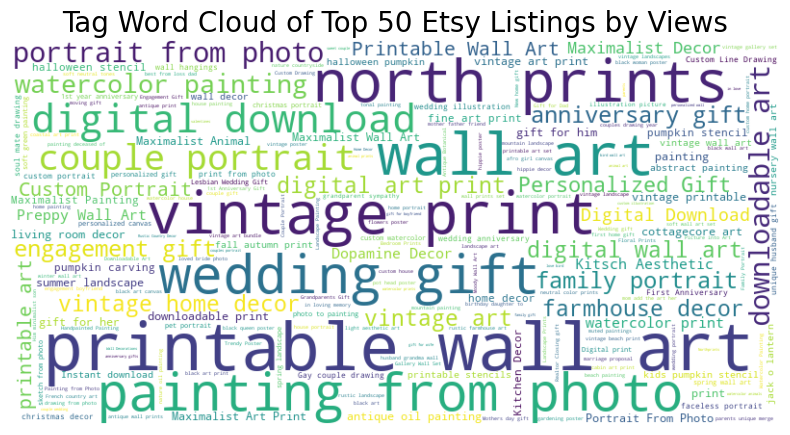

                    Tag  Frequency
0    printable wall art          8
1              wall art          6
2         vintage print          6
3          north prints          6
4          wedding gift          5
5   painting from photo          5
6      digital download          5
7       couple portrait          4
8   portrait from photo          4
9      downloadable art          4
10  watercolor painting          4
11      engagement gift          3
12     anniversary gift          3
13      family portrait          3
14   vintage home decor          3
15      farmhouse decor          3
16    digital art print          3
17          vintage art          3
18     digital wall art          3
19    Personalized Gift          3


In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Combine all tags into a single string
all_tags = ', '.join(top_listings_df['tags'].dropna().tolist())

# Split the tags by comma and strip any leading/trailing whitespace
tags_list = [tag.strip() for tag in all_tags.split(',')]

# Count the frequency of each tag
tag_counts = Counter(tags_list)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis

# Add a title to the figure
plt.title('Tag Word Cloud of Top 50 Etsy Listings by Views', fontsize=20)

# Save the figure
plt.savefig('tag_word_cloud.png', format='png', bbox_inches='tight')

# Show the word cloud
plt.show()

# Get the top 10 tags by frequency
top_tags = tag_counts.most_common(20)

# Create a DataFrame for the top tags
top_tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Frequency'])

# Display the top 20 tags and their frequencies
print(top_tags_df)


In [79]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the top 50 listings by views, including the description
query = """
SELECT 
    title,
    description
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_with_description_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame to verify
print(top_listings_with_description_df.head())


                                               title  \
0  Personalized Watercolor Memorial Portrait on C...   
1  watercolor painting from photo, custom dog por...   
2  Digital Pet Portrait, Custom Pet Portrait, Pet...   
3  Custom Mini Watercolor Pet Portrait, Tiny Dog ...   
4  Watercolor painting from photo, watercolor pai...   

                                         description  
0  🎁 Voted #1 Family Gift of 2023 🎁\n\nThere are ...  
1  This amazing watercolor painting from a photo ...  
2  This listing is for a digital file only. No ph...  
3  Each Mini–Pet Portrait painting is a one-of-a-...  
4  Why Choose LUMA Design ?? ✅✅✅\n\n-Our watercol...  


In [82]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the top 50 listings by views along with their descriptions
query = """
SELECT 
    title,
    description
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Calculate word count for descriptions
top_listings_df['word_count'] = top_listings_df['description'].str.split().str.len()

# Get the range of word counts
word_count_min = top_listings_df['word_count'].min()
word_count_max = top_listings_df['word_count'].max()

# Create bins for the word counts
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
top_listings_df['word_count_bins'] = pd.cut(top_listings_df['word_count'], bins)

# Count the number of descriptions in each bin
bin_counts = top_listings_df['word_count_bins'].value_counts().sort_index()

# Display the results
print("Word Count Range:", (word_count_min, word_count_max))
print(bin_counts)


Word Count Range: (57, 1030)
word_count_bins
(50, 100]      5
(100, 150]     3
(150, 200]     5
(200, 250]    11
(250, 300]     4
(300, 350]     6
(350, 400]     2
(400, 450]     2
(450, 500]     2
(500, 550]     3
(550, 600]     1
Name: count, dtype: int64


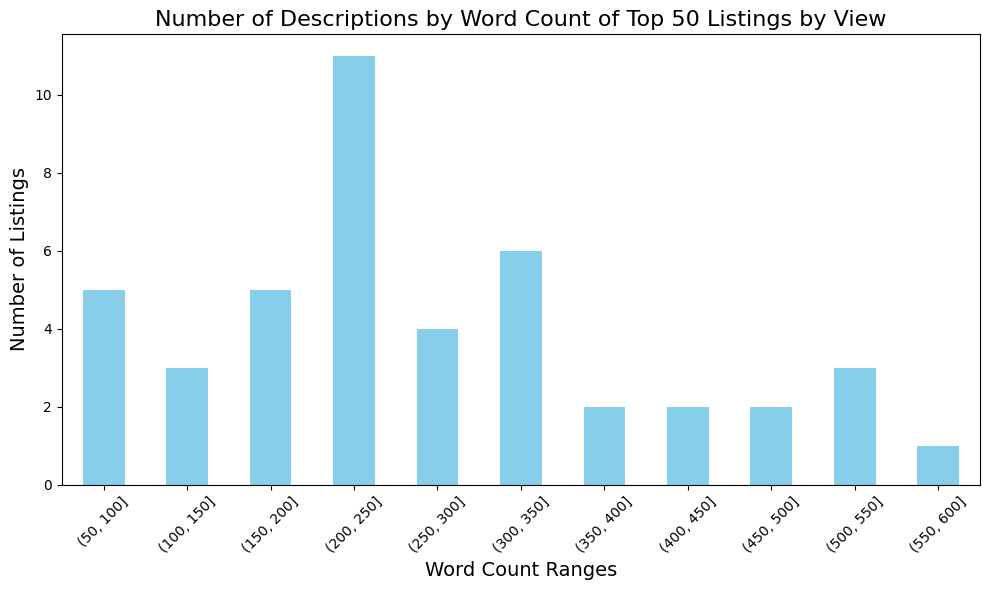

<Figure size 640x480 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt

# Prepare the bar chart data
bin_counts = top_listings_df['word_count_bins'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Number of Descriptions by Word Count of Top 50 Listings by View', fontsize=16)
plt.xlabel('Word Count Ranges', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout
plt.show()

plt.savefig('description_word_count_distribution.png', format='png', bbox_inches='tight')

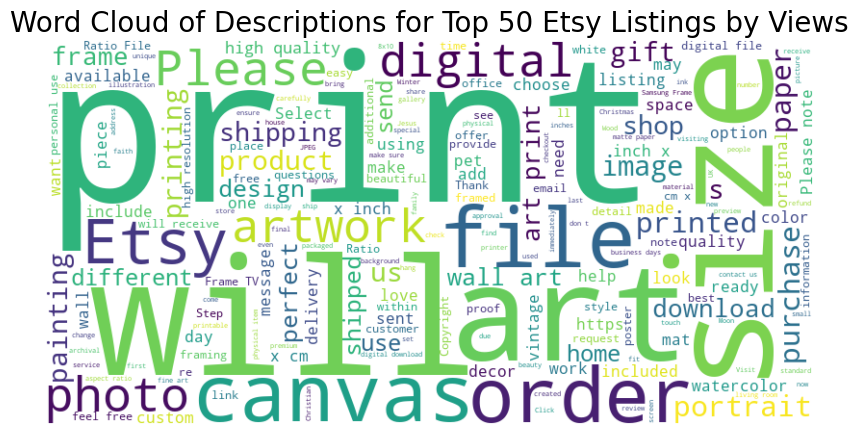

In [94]:
import sqlite3
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the top 50 listings by views along with their descriptions
query = """
SELECT 
    description
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_listings_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Combine all descriptions into a single string
all_descriptions = ' '.join(top_listings_df['description'].dropna().tolist())

# Replace HTML encoded characters
all_descriptions = all_descriptions.replace("&quot;", '"').replace("&amp;", "&").replace("&apos;", "'")

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis

# Add a title to the figure
plt.title('Word Cloud of Descriptions for Top 50 Etsy Listings by Views', fontsize=20)

# Save the figure
plt.savefig('descriptions_etsy_word_cloud.png', format='png', bbox_inches='tight')

# Show the word cloud
plt.show()


In [99]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve descriptions for the top 50 listings by views
query = """
SELECT 
    description
FROM etsy_listings
ORDER BY views DESC
LIMIT 50;
"""
top_listings_df = pd.read_sql(query, conn)
conn.close()

# Define keywords for product and instruction categories
product_keywords = ['features', 'dimensions', 'color', 'design', 'material','unique', 'beautiful', 'enhance']
instruction_keywords = ['download', 'shipping', 'instant', 'send', 'receive', 'print', 'download']

# Function to categorize descriptions
def categorize_description(description):
    product_count = sum(description.lower().count(keyword) for keyword in product_keywords)
    instruction_count = sum(description.lower().count(keyword) for keyword in instruction_keywords)
    
    return product_count, instruction_count

# Apply the categorization function to the descriptions
top_listings_df[['product_count', 'instruction_count']] = top_listings_df['description'].apply(categorize_description).apply(pd.Series)

# Summarize results
summary = {
    'Total Listings': len(top_listings_df),
    'Total Product Mentions': top_listings_df['product_count'].sum(),
    'Total Instruction Mentions': top_listings_df['instruction_count'].sum()
}

print(summary)

# Optionally, view counts for each description
print(top_listings_df[['description', 'product_count', 'instruction_count']])


{'Total Listings': 50, 'Total Product Mentions': 191, 'Total Instruction Mentions': 667}
                                          description  product_count  \
0   🎁 Voted #1 Family Gift of 2023 🎁\n\nThere are ...              1   
1   This amazing watercolor painting from a photo ...              9   
2   This listing is for a digital file only. No ph...              2   
3   Each Mini–Pet Portrait painting is a one-of-a-...              3   
4   Why Choose LUMA Design ?? ✅✅✅\n\n-Our watercol...              6   
5   Enchanting Celestial Moon Art Print - Vintage-...              5   
6   A classic personalised pen sketch based on you...              0   
7   Faith as Small as a Mustard Seed DIGITAL DOWNL...              3   
8   When you purchase a digital product, your imag...              4   
9   Tree Ring Framed Wall Art, Abstract Colorful T...              4   
10  🌸We are making a new Oil Painting style family...              0   
11  For FRAMED PRINTS and CANVASES please use t

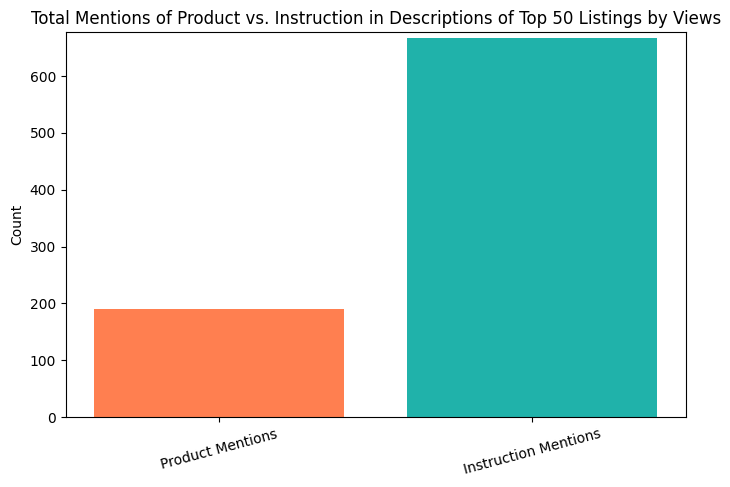

In [108]:
import matplotlib.pyplot as plt

# Assuming `top_listings_df` already has `product_count` and `instruction_count`

# Calculate the total counts
total_product_count = top_listings_df['product_count'].sum()
total_instruction_count = top_listings_df['instruction_count'].sum()

# Prepare data for plotting
categories = ['Product Mentions', 'Instruction Mentions']
counts = [total_product_count, total_instruction_count]

# Define colors
colors = ['coral', 'lightseagreen']  # Coral and a complementary color

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=colors)
plt.ylabel('Count')
plt.title('Total Mentions of Product vs. Instruction in Descriptions of Top 50 Listings by Views')
plt.xticks(rotation=15)
plt.ylim(0, max(counts) + 10)  # Set y-axis limit for better visibility

# Save the figure if desired
plt.savefig('product_vs_instruction_mentions.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [118]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve review counts per listing
query_reviews = """
SELECT 
    listing_id, 
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id
ORDER BY review_count DESC;  -- Sort by review count in descending order
"""

# Execute the query and load the results into a DataFrame
reviews_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()

# Display the sorted DataFrame
print(reviews_df)


    listing_id  review_count
0   1729608168            25
1   1723107930            25
2   1712075083            25
3   1695131762            25
4   1607664682            25
..         ...           ...
71  1492896432             1
72  1260384128             1
73  1210168541             1
74   930903330             1
75   840246218             1

[76 rows x 2 columns]


In [120]:
import pandas as pd

# Assuming you already have the reviews_df DataFrame defined
# You can set pandas to display all rows
pd.set_option('display.max_rows', None)

# Now you can print the entire DataFrame
print(reviews_df)

# Reset the display option back to default if needed
# pd.reset_option('display.max_rows')


    listing_id  review_count
0   1729608168            25
1   1723107930            25
2   1712075083            25
3   1695131762            25
4   1607664682            25
5   1594976623            25
6   1567545027            25
7   1561236092            25
8   1549362075            25
9   1517287556            25
10  1491594213            25
11  1435602811            25
12  1407983980            25
13  1387585427            25
14  1349321977            25
15  1315048941            25
16  1241886892            25
17  1237647786            25
18  1146622408            25
19  1083643600            25
20   979304488            25
21  1745003848            23
22  1380166648            22
23  1356237931            22
24  1674608982            19
25  1340145706            19
26  1596162078            18
27  1581975187            16
28  1467556793            14
29  1580289345            13
30  1346332774            13
31  1716033190            11
32   400586043            11
33  1736835196

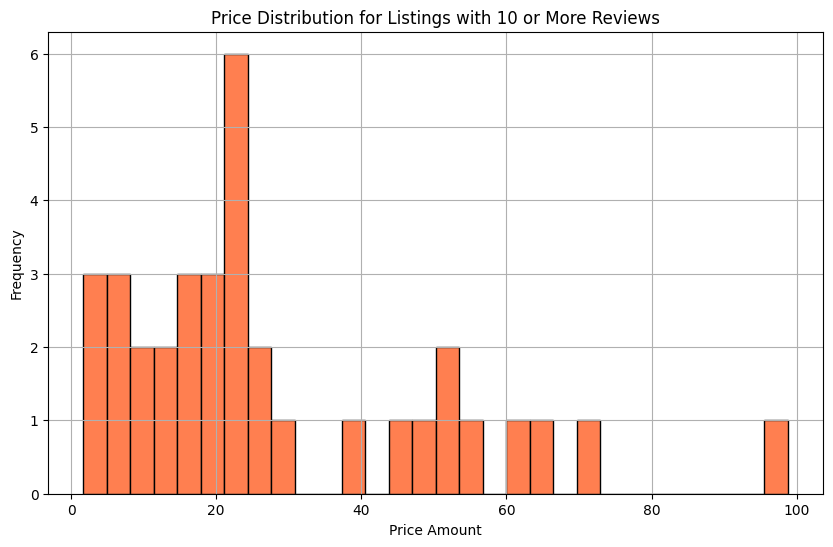

In [121]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve price data for each listing
query_listings = """
SELECT 
    listing_id, 
    price_amount 
FROM etsy_listings;
"""
listings_df = pd.read_sql(query_listings, conn)

# Step 2: Retrieve review counts per listing
query_reviews = """
SELECT 
    listing_id, 
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id;
"""
reviews_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()

# Step 3: Merge the data
merged_df = pd.merge(listings_df, reviews_df, on='listing_id', how='left').fillna(0)

# Step 4: Filter for listings with 10 or more reviews
filtered_listings = merged_df[merged_df['review_count'] >= 10]

# Step 5: Visualize the price distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_listings['price_amount'], bins=30, color='coral', edgecolor='black')
plt.title('Price Distribution for Listings with 10 or More Reviews')
plt.xlabel('Price Amount')
plt.ylabel('Frequency')
plt.grid(True)

# Save the figure if needed
plt.savefig('price_distribution_high_reviews.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [122]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve price data for each listing
query_listings = """
SELECT 
    listing_id, 
    price_amount 
FROM etsy_listings;
"""
listings_df = pd.read_sql(query_listings, conn)

# Step 2: Retrieve review counts per listing
query_reviews = """
SELECT 
    listing_id, 
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id;
"""
reviews_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()

# Step 3: Merge the data
merged_df = pd.merge(listings_df, reviews_df, on='listing_id', how='left').fillna(0)

# Step 4: Filter for listings with 10 or more reviews
filtered_listings = merged_df[merged_df['review_count'] >= 10]

# Step 5: Get the range of prices
price_range = (filtered_listings['price_amount'].min(), filtered_listings['price_amount'].max())
print("Price Range for Listings with 10 or More Reviews:", price_range)


Price Range for Listings with 10 or More Reviews: (1.69, 98.8)


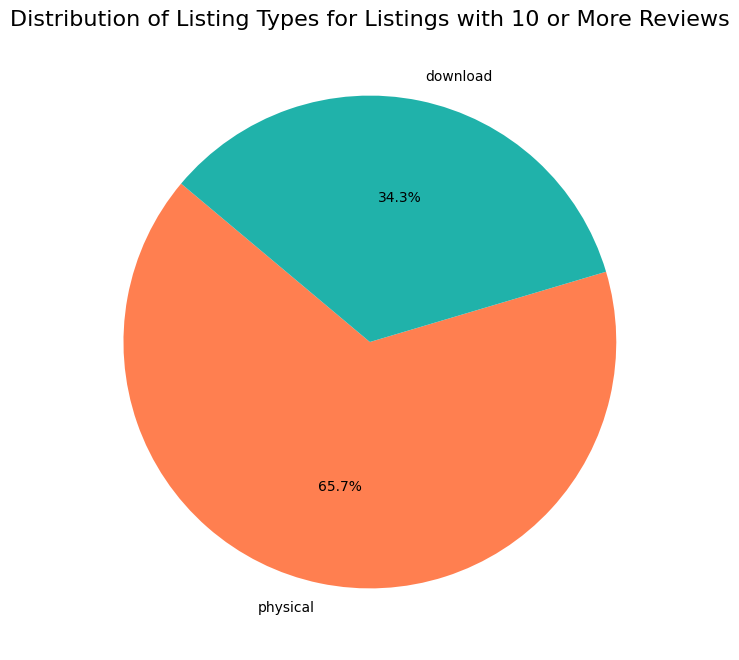

In [126]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve price and listing type data for each listing
query_listings = """
SELECT 
    listing_id, 
    price_amount,
    listing_type
FROM etsy_listings;
"""
listings_df = pd.read_sql(query_listings, conn)

# Step 2: Retrieve review counts per listing
query_reviews = """
SELECT 
    listing_id, 
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id;
"""
reviews_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()

# Step 3: Merge the data
merged_df = pd.merge(listings_df, reviews_df, on='listing_id', how='left').fillna(0)

# Step 4: Filter for listings with 10 or more reviews
filtered_listings = merged_df[merged_df['review_count'] >= 10]

# Step 5: Count the occurrences of each listing type
listing_type_counts = filtered_listings['listing_type'].value_counts()

# Define colors
colors = ['coral', 'lightseagreen']  # Coral and a complementary color

# Step 6: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(listing_type_counts, labels=listing_type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Listing Types for Listings with 10 or More Reviews', fontsize=16)

# Save the figure
plt.savefig('listing_type_distribution_pie_chart.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


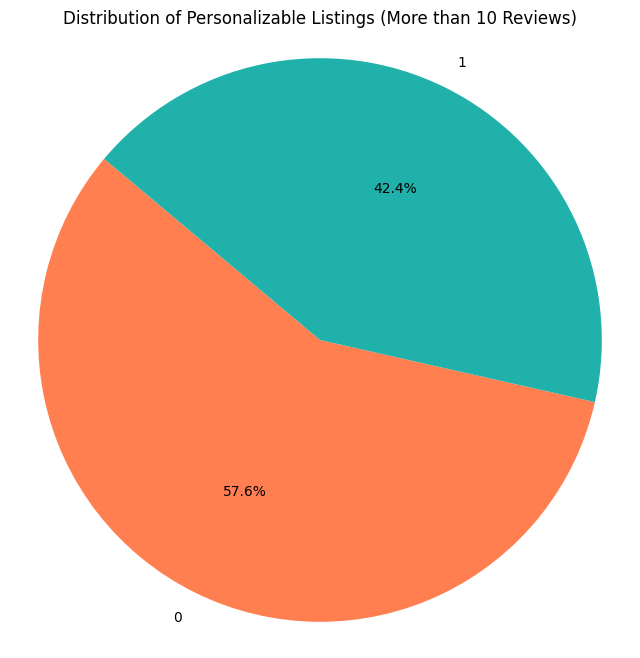

In [136]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve review counts per listing with personalizable status
query_reviews = """
SELECT 
    l.is_personalizable, 
    COUNT(*) AS listing_count
FROM etsy_listings l
JOIN (
    SELECT listing_id 
    FROM etsy_reviews 
    GROUP BY listing_id 
    HAVING COUNT(*) > 10
) AS r ON l.listing_id = r.listing_id
GROUP BY l.is_personalizable;
"""

# Execute the query and load the results into a DataFrame
personalizable_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()
# Define colors
colors = ['coral', 'lightseagreen']  # Coral and a complementary color
# Step 2: Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(personalizable_df['listing_count'], labels=personalizable_df['is_personalizable'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Personalizable Listings (More than 10 Reviews)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Save the figure
plt.savefig('personalizable_listings_pie_chart.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


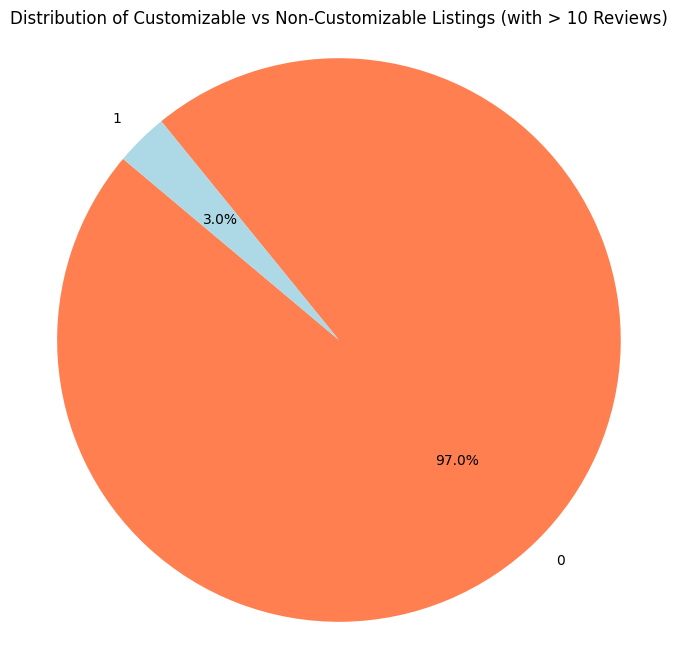

In [132]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Retrieve the listings with more than 10 reviews and their customization status
query = """
SELECT 
    listing_id, 
    is_customizable 
FROM etsy_listings 
WHERE listing_id IN (
    SELECT listing_id 
    FROM etsy_reviews 
    GROUP BY listing_id 
    HAVING COUNT(*) > 10
);
"""

# Execute the query and load the results into a DataFrame
customizable_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Count occurrences of each category in 'is_customizable'
customizable_counts = customizable_df['is_customizable'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(customizable_counts, labels=customizable_counts.index, autopct='%1.1f%%', startangle=140, colors=['coral', 'lightblue'])
plt.title('Distribution of Customizable vs Non-Customizable Listings (with > 10 Reviews)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Save the figure
plt.savefig('customizable_pie_chart.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [133]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve listing IDs and their corresponding sales
query = """
SELECT 
    l.listing_id,
    l.title,
    s.transaction_sold_count
FROM etsy_listings l
JOIN etsy_shops s ON l.shop_id = s.shop_id
ORDER BY s.transaction_sold_count DESC;
"""

# Execute the query and load the results into a DataFrame
sales_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Display the organized listings by sales in descending order
print(sales_df.head(50))  # Show the top 50 listings by sales


    listing_id                                              title  \
0    992096722  Muted Watercolor Landscape | Rustic Valley Pri...   
1   1561236092  Prodigal Son Returns, DIGITAL PRINT!, Biblical...   
2   1349321977  Digital Pet Portrait, Custom Pet Portrait, Pet...   
3   1596162078  Vintage Christmas Bundle of Frame TV Arts, San...   
4    596176269  Twin baby gift Elephant nursery name sign, Saf...   
5   1712075083  Custom Memorial Painting Gift, Add Deceased Lo...   
6   1241886892  Personalized Watercolor Memorial Portrait on C...   
7   1083643600  watercolor painting from photo, custom dog por...   
8   1574076683  Vintage Christmas Wall Art Bar Cart Art Printa...   
9   1599389212  Vintage Lit Christmas Tree in Window Holiday A...   
10  1491594213  Custom Mini Watercolor Pet Portrait, Tiny Dog ...   
11  1237647786  Custom Hand-Painted House Painting, New Home H...   
12  1407983980  Faith as Small as a Mustard Seed Can Move Moun...   
13  1594976623  Winter Frame TV Ar

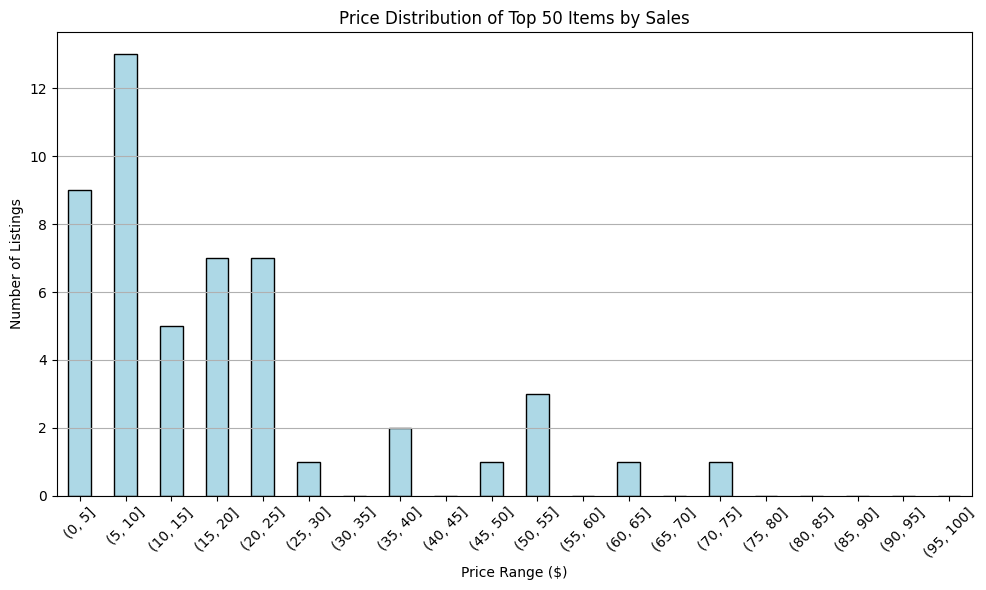

In [144]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve the top 50 listings by sales along with their prices
query = """
SELECT 
    l.listing_id,
    l.title,
    l.price_amount,
    s.transaction_sold_count
FROM etsy_listings l
JOIN etsy_shops s ON l.shop_id = s.shop_id
ORDER BY s.transaction_sold_count DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_sales_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Step 2: Create price distribution ranges
price_bins = range(0, 101, 5)  # Create bins from $0 to $100 in $5 increments
top_sales_df['price_range'] = pd.cut(top_sales_df['price_amount'], bins=price_bins)

# Step 3: Count the number of items in each price range
price_distribution = top_sales_df['price_range'].value_counts().sort_index()

# Step 4: Create a bar chart to visualize the price distribution
plt.figure(figsize=(10, 6))

# Plot with light blue bars and black edges
price_distribution.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Price Distribution of Top 50 Items by Sales')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better visibility

# Save the figure
plt.savefig('price_distribution_top_50_items.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


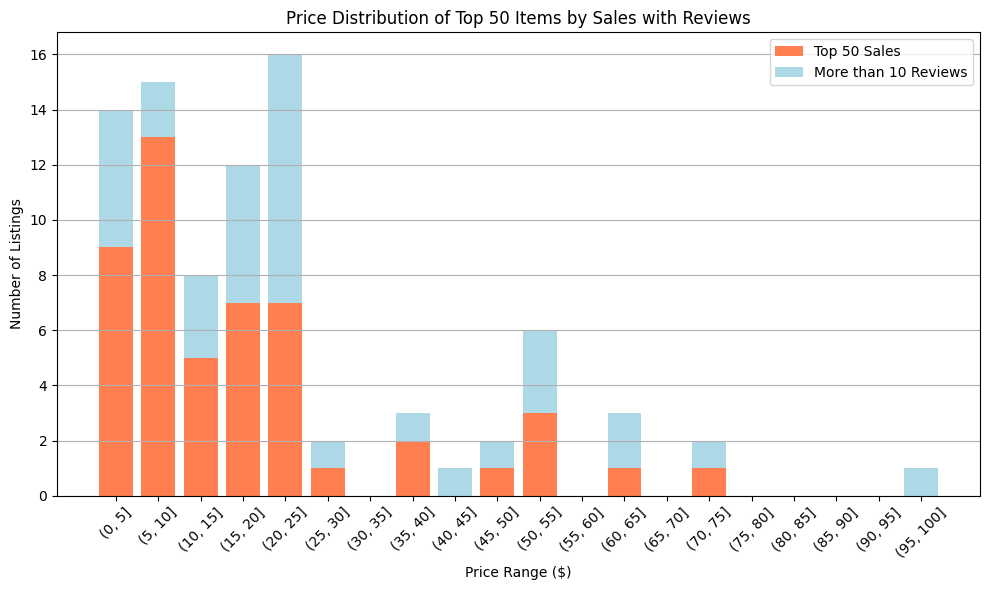

In [140]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve the top 50 listings by sales along with their prices
query_sales = """
SELECT 
    l.listing_id,
    l.title,
    l.price_amount,
    s.transaction_sold_count
FROM etsy_listings l
JOIN etsy_shops s ON l.shop_id = s.shop_id
ORDER BY s.transaction_sold_count DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_sales_df = pd.read_sql(query_sales, conn)

# Step 2: Create price distribution ranges for the top 50
price_bins = range(0, 101, 5)  # Create bins from $0 to $100 in $5 increments
top_sales_df['price_range'] = pd.cut(top_sales_df['price_amount'], bins=price_bins)

# Step 3: Count the number of items in each price range for top sales
top_sales_counts = top_sales_df['price_range'].value_counts().sort_index()

# Step 4: Retrieve reviews data to count listings with more than 10 reviews
query_reviews = """
SELECT 
    listing_id,
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id 
HAVING review_count > 10;
"""
reviews_df = pd.read_sql(query_reviews, conn)

# Step 5: Retrieve all listings with more than 10 reviews to get price distribution
query_all_reviews = """
SELECT 
    l.listing_id, 
    l.price_amount 
FROM etsy_listings l
WHERE l.listing_id IN (SELECT listing_id FROM etsy_reviews GROUP BY listing_id HAVING COUNT(*) >= 10);
"""
all_reviews_df = pd.read_sql(query_all_reviews, conn)

# Create price distribution ranges for listings with more than 10 reviews
all_reviews_df['price_range'] = pd.cut(all_reviews_df['price_amount'], bins=price_bins)
high_review_counts = all_reviews_df['price_range'].value_counts().reindex(top_sales_counts.index, fill_value=0)

# Step 6: Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_sales_counts.index.astype(str), top_sales_counts.values, color='coral', label='Top 50 Sales')
plt.bar(high_review_counts.index.astype(str), high_review_counts.values, bottom=top_sales_counts.values, color='lightblue', label='More than 10 Reviews')
plt.title('Price Distribution of Top 50 Items by Sales with Reviews')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()  # Adjust layout for better visibility

# Save the figure
plt.savefig('stacked_price_distribution_top_50_items_with_all_reviews.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

# Close the database connection
conn.close()


/var/folders/zz/f0f36rfs43b6k5x8mw7w6y5r0000gq/T/ipykernel_31211/3577764474.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_listings['price_range'] = pd.cut(filtered_listings['price_amount'], bins=price_bins)


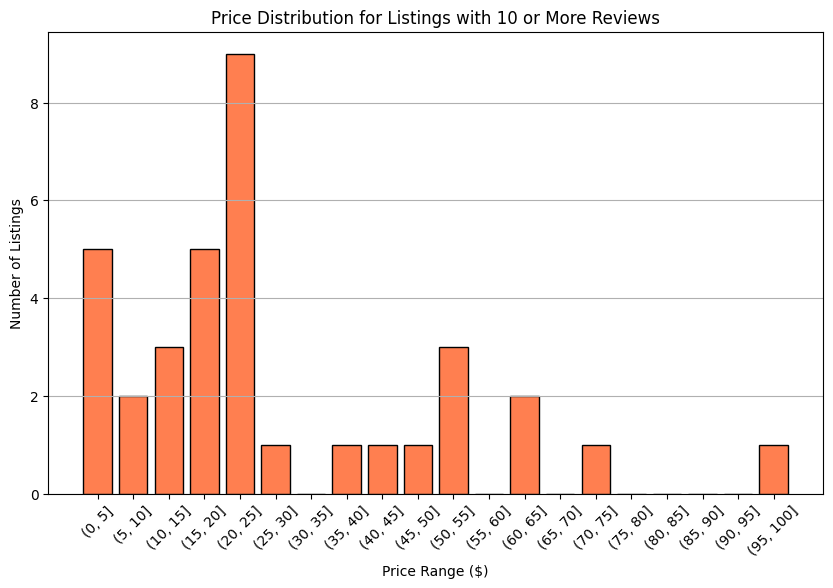

In [141]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve price data for each listing
query_listings = """
SELECT 
    listing_id, 
    price_amount 
FROM etsy_listings;
"""
listings_df = pd.read_sql(query_listings, conn)

# Step 2: Retrieve review counts per listing
query_reviews = """
SELECT 
    listing_id, 
    COUNT(*) AS review_count 
FROM etsy_reviews 
GROUP BY listing_id;
"""
reviews_df = pd.read_sql(query_reviews, conn)

# Close the database connection
conn.close()

# Step 3: Merge the data
merged_df = pd.merge(listings_df, reviews_df, on='listing_id', how='left').fillna(0)

# Step 4: Filter for listings with 10 or more reviews
filtered_listings = merged_df[merged_df['review_count'] >= 10]

# Step 5: Create price distribution ranges
price_bins = range(0, 101, 5)  # Create bins from $0 to $100 in $5 increments
filtered_listings['price_range'] = pd.cut(filtered_listings['price_amount'], bins=price_bins)

# Count the number of items in each price range
price_distribution = filtered_listings['price_range'].value_counts().sort_index()

# Step 6: Visualize the price distribution
plt.figure(figsize=(10, 6))
plt.bar(price_distribution.index.astype(str), price_distribution.values, color='coral', edgecolor='black')
plt.title('Price Distribution for Listings with 10 or More Reviews')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure if needed
plt.savefig('price_distribution_high_reviews_adjusted.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


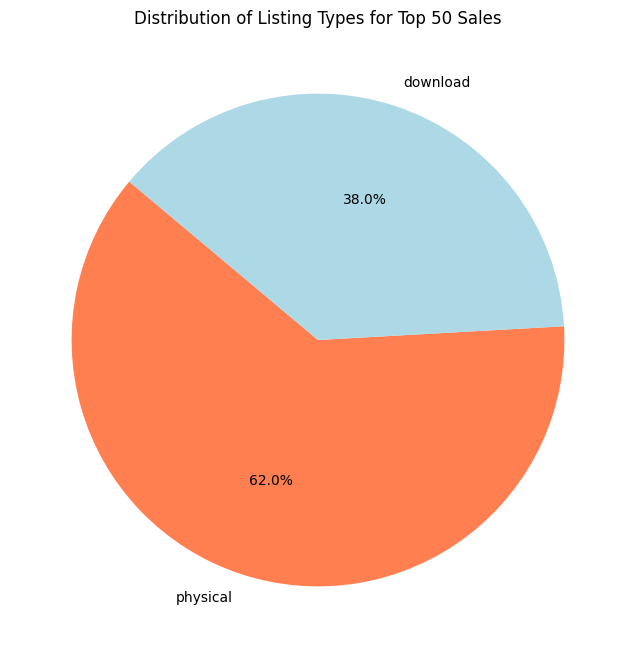

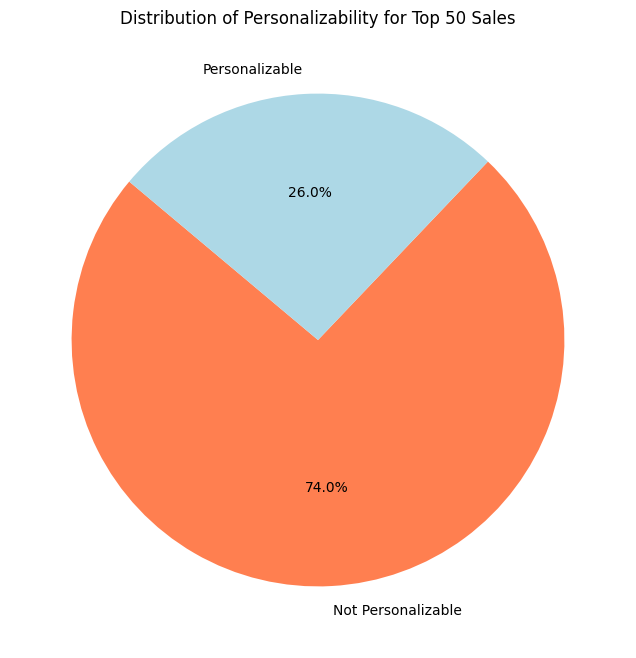

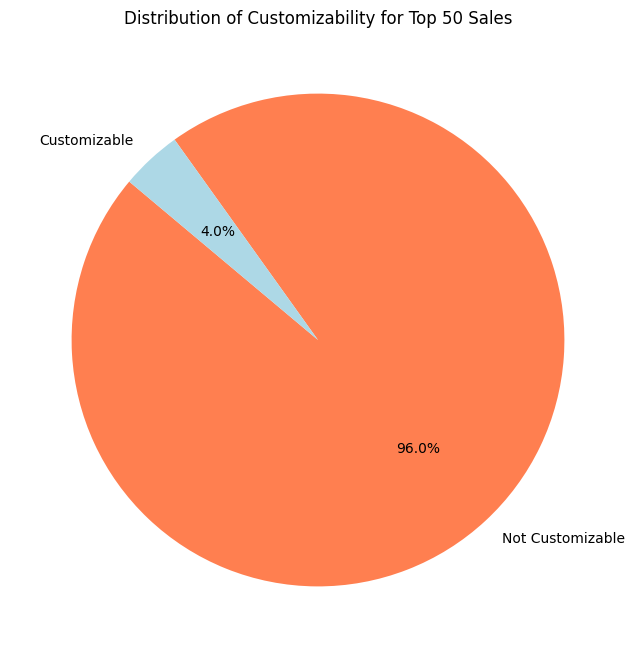

In [146]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('etsy_data.db')

# Step 1: Retrieve the top 50 listings by sales along with their relevant columns
query = """
SELECT 
    l.listing_id,
    l.title,
    l.price_amount,
    s.transaction_sold_count,
    l.listing_type,
    l.is_personalizable,
    l.is_customizable
FROM etsy_listings l
JOIN etsy_shops s ON l.shop_id = s.shop_id
ORDER BY s.transaction_sold_count DESC
LIMIT 50;
"""

# Execute the query and load the results into a DataFrame
top_sales_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Define colors
coral = '#FF7F50'  # Coral color
light_blue = '#ADD8E6'  # Light Blue as complementary color

# Step 2: Create pie chart for listing_type
listing_type_counts = top_sales_df['listing_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(listing_type_counts, labels=listing_type_counts.index, autopct='%1.1f%%', startangle=140, colors=[coral, light_blue])
plt.title('Distribution of Listing Types for Top 50 Sales')
plt.show()

# Step 3: Create pie chart for is_personalizable
personalizable_counts = top_sales_df['is_personalizable'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(personalizable_counts, labels=['Not Personalizable', 'Personalizable'], autopct='%1.1f%%', startangle=140, colors=[coral, light_blue])
plt.title('Distribution of Personalizability for Top 50 Sales')
plt.show()

# Step 4: Create pie chart for is_customizable
customizable_counts = top_sales_df['is_customizable'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customizable_counts, labels=['Not Customizable', 'Customizable'], autopct='%1.1f%%', startangle=140, colors=[coral, light_blue])
plt.title('Distribution of Customizability for Top 50 Sales')
plt.show()
